# DSCI 100 Group Project Proposal: The relationship between various socioeconomic factors and life expectancy at birth
##### Group 141: Matilde Galantino, Jacob Guglielmin, Phoenix Jin, Amy Wong 

### Introduction
#### Background 

Life expectancy is a crucial metric in assessing the wellbeing of populations, and as such, is of pertinence in both medical and socioeconomic research. Life expectancy is a measurement of the mean age of death in a population, providing general insights into human mortality (Roser, Ortiz-Ospina & Ritchie, 2013). Life expectancy has risen drastically in industrialized countries since the 19th century due to improvements in technology and healthcare, from 66.8 years in 2000 to 73.4 years in 2019 (World Health Organization, 2019). However, this increase is not truly equal - countries with lower human development have consistently reported lower life expectancies, leading to a large discrepancy in health worldwide (Roser et al., 2013).

Under the assumption that higher life expectancy leads to positive contributions to the economy, as well as general human development, it is important to determine what impedes or enhances the life expectancy of the population.

We will be using datasets compiled by the United Nations Development Programme and the World Bank, which contain data describing socioeconomic conditions in each country by year.

#### Question 

How do carbon dioxide emissions per capita (CDE), mean years of schooling, gross national income (GNI), and poverty headcount ratio at $6.85 a day (PHR) affect life expectancy for both less developed and more developed countries? How can low human developed countries increase their life expectancy at birth? 


### Preliminary exploratory data analysis

##### **Run the following cell before continuing further - set** `need_install = TRUE` **if either tidyverse or tidymodels are not installed on your system:**

In [1]:
need_install = FALSE

if (need_install) install.packages(c("tidyverse", "tidymodels"))

library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### Read in data from the web:

##### We are reading these data from GitHub, as we downloaded the data manually and uploaded the data we require since much of the data came packaged in a .zip file rather than available as a raw .csv. In addition, we can ensure that these links remain available, unlike the links of the original publishers.

In [2]:
# Download data - hdi_composite_data_raw (data orginally from United Nations Development Programme) 
hdi_composite_data_raw <- read_csv("https://raw.githubusercontent.com/phoenixjin8/dsci100-group-project/main/data/hdr_composite_index.csv", show_col_types = FALSE)

hdi_composite_data_raw

iso3,country,hdicode,region,hdi_rank_2021,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,⋯,mf_2012,mf_2013,mf_2014,mf_2015,mf_2016,mf_2017,mf_2018,mf_2019,mf_2020,mf_2021
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AFG,Afghanistan,Low,SA,180,0.273,0.279,0.287,0.297,0.292,⋯,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38
AGO,Angola,Medium,SSA,148,NA,NA,NA,NA,NA,⋯,4.09,4.53,3.97,3.59,2.79,2.64,2.28,2.18,2.18,2.18
ALB,Albania,High,ECA,67,0.647,0.629,0.614,0.617,0.624,⋯,12.44,11.49,13.14,12.61,14.39,14.46,12.85,12.96,12.96,12.96
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ZAF,South Africa,High,SSA,109,0.632,0.641,0.647,0.652,0.658,⋯,9.55,10.09,8.41,8.06,7.55,7.76,7.60,7.55,7.55,7.55
ZMB,Zambia,Medium,SSA,154,0.412,0.408,0.408,0.414,0.411,⋯,4.74,4.68,3.92,3.36,3.12,3.21,2.80,2.38,2.38,2.38
ZWE,Zimbabwe,Medium,SSA,146,0.509,0.512,0.498,0.491,0.486,⋯,3.13,2.86,3.03,2.66,2.29,2.26,2.05,1.21,1.21,1.21


In [3]:
#Download data - poverty_rate_data_raw (data orginally from World Bank) 
poverty_rate_data_raw <- read_csv("https://raw.githubusercontent.com/phoenixjin8/dsci100-group-project/main/data/poverty_rate.csv", skip = 4, show_col_types = FALSE)

poverty_rate_data_raw

country_name,country_code,development,indicator_name,indicator_code,1960,1961,1962,1963,1964,⋯,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aruba,ABW,NA,Poverty headcount ratio at $6.85 a day (2017 PPP) (% of population),SI.POV.UMIC,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,AFG,Low,Poverty headcount ratio at $6.85 a day (2017 PPP) (% of population),SI.POV.UMIC,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Angola,AGO,Medium,Poverty headcount ratio at $6.85 a day (2017 PPP) (% of population),SI.POV.UMIC,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,78,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
South Africa,ZAF,High,Poverty headcount ratio at $6.85 a day (2017 PPP) (% of population),SI.POV.UMIC,NA,NA,NA,NA,NA,⋯,NA,NA,61.6,NA,NA,NA,NA,NA,NA,NA
Zambia,ZMB,Medium,Poverty headcount ratio at $6.85 a day (2017 PPP) (% of population),SI.POV.UMIC,NA,NA,NA,NA,NA,⋯,NA,NA,NA,90.7,NA,NA,NA,NA,NA,NA
Zimbabwe,ZWE,Medium,Poverty headcount ratio at $6.85 a day (2017 PPP) (% of population),SI.POV.UMIC,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,84.1,NA,85,NA,NA


### Clean and wrangle data into a tidy format:

In [4]:
# Tidy poverty rate data
poverty_rate_data <- poverty_rate_data_raw
poverty_rate_data <- poverty_rate_data |>
    select(-country_name, -indicator_name, -indicator_code, -development) |>
    pivot_longer(c(-country_code), names_to = "year", values_to = "poverty_rate") |>
    filter(!is.na(poverty_rate))

# Tidy HDI data
# Eliminate irrelevant columns
hdi_composite_data_relevant <- hdi_composite_data_raw |>
    select(-country, -hdicode, -region, -hdi_rank_2021)
# We will write to a new dataframe rather than edit the existing one since the raw data is horrific to work with
# Extract CO2 emissions data and country codes
hdi_composite_data <- hdi_composite_data_relevant |>
    select(iso3, co2_prod_1990:co2_prod_2021) |>
    # Remove all information from column name except the year (change each column name to the last 4 characters of itself, ignore "iso3")
    rename_with(function(x){ifelse(x == "iso3", "iso3", substring(x, nchar(x) - 3))}) |>
    pivot_longer(-iso3, names_to = "year", values_to = "co2_per_capita")
# Extract mean years of schooling data
hdi_composite_data <- merge(hdi_composite_data,
                            (hdi_composite_data_relevant |>
                             select(iso3, mys_1990:mys_2021) |>
                             rename_with(function(x){ifelse(x == "iso3", "iso3", substring(x, nchar(x) - 3))}) |>
                             pivot_longer(-iso3, names_to = "year", values_to = "mean_schooling")))
# Extract GNI per capita data
hdi_composite_data <- merge(hdi_composite_data,
                            (hdi_composite_data_relevant |>
                             select(iso3, gnipc_1990:gnipc_2021) |>
                             rename_with(function(x){ifelse(x == "iso3", "iso3", substring(x, nchar(x) - 3))}) |>
                             pivot_longer(-iso3, names_to = "year", values_to = "gni_per_capita")))
# Extract life expectancy data
hdi_composite_data <- merge(hdi_composite_data,
                            (hdi_composite_data_relevant |>
                             select(iso3, le_1990:le_2021) |>
                             rename_with(function(x){ifelse(x == "iso3", "iso3", substring(x, nchar(x) - 3))}) |>
                             pivot_longer(-iso3, names_to = "year", values_to = "life_expectancy")))

# Merge HDI data with poverty rate data and convert year to a number
tidy_data <- merge(poverty_rate_data, hdi_composite_data, by.x = c("country_code", "year"), by.y = c("iso3", "year"), all = TRUE) |>
    mutate(year = as.numeric(year))

# Add development rating
tidy_data <- left_join(tidy_data, select(poverty_rate_data_raw, country_code, development), by = "country_code")    

# Consolidate Low and Medium development into "Less Developed", High and Very High into "More Developed"
tidy_data <- filter(tidy_data, !is.na(development)) |>
    mutate(development = ifelse(development == "Low" | development == "Medium", "Less Developed", "More Developed")) |>
    mutate(development = as.factor(development))

# Reorder the columns to make sense
tidy_data <- tidy_data[,c("country_code", "development", "year", "life_expectancy", "gni_per_capita", "poverty_rate", "mean_schooling", "co2_per_capita")] |>
    
# Remove the 4 data points that are WAY out the bottom of the life expectancy chart - these appear to be
# substantial departures from normal for their countries (Rwanda and South Sudan) and are directly between
# much higher values, so we are assuming these to be data collection errors
    filter(life_expectancy > 25) |>

# Remove every row with no life expectancy value, since everything is based on those values
    filter(!is.na(life_expectancy))

# Reorder the development category so that legends are in a reasonable order
tidy_data$development <- factor(tidy_data$development, levels = c("More Developed", "Less Developed"))

tidy_data

country_code,development,year,life_expectancy,gni_per_capita,poverty_rate,mean_schooling,co2_per_capita
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AFG,Less Developed,1990,45.9672,2684.550,NA,0.9711254,0.20972731
AFG,Less Developed,1991,46.6631,2276.289,NA,1.0193558,0.18252477
AFG,Less Developed,1992,47.5955,2059.868,NA,1.0675862,0.09523286
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
ZWE,Less Developed,2019,61.2925,3674.564,85,8.710909,0.7476101
ZWE,Less Developed,2020,61.1242,3654.289,NA,8.710909,0.7085618
ZWE,Less Developed,2021,59.2531,3809.887,NA,8.710909,0.7085618


### Summarize and visualize the data:

#### Split data to produce training data:

In [5]:
# Split data into training and testing groups, stratified by life expectancy
data_split <- initial_split(tidy_data, prop = 0.75, strata = life_expectancy)
training_data <- training(data_split)
testing_data <- testing(data_split)

#### Create visualizations for the data:

In [6]:
# Select the columns that contain data we plan to model
data_cols <- select(training_data, life_expectancy:co2_per_capita)

# Count number of datapoints per column by development category
development_groups_counts <- select(training_data, -country_code, -year) |>
    group_by(development) |>
    summarize_all(list(~ sum(!is.na(.)))) |>
    add_row(mutate(as_tibble_row(colSums(!is.na(data_cols))), development = "Combined"), .before = 1)

In [7]:
# Take mean of each column by development category
development_groups_means <- select(training_data, -country_code, -year) |>
    group_by(development) |>
    summarize_all(list(~ sum(., na.rm = TRUE)/sum(!is.na(.)))) |>
    add_row(mutate(as_tibble_row(colMeans(data_cols, na.rm = TRUE)), development = "Combined"), .before = 1)

In [8]:
# Create plot of life expectancy vs. GNI
options(repr.plot.width = 14, repr.plot.height = 9)
gni_plot <- training_data |>
    ggplot(aes(x = gni_per_capita, y = life_expectancy, colour = development)) +
    geom_point(alpha = 0.8) +
    labs(x = "GNI (per capita)", y = "Life Expectancy", colour = "Development") +
    theme(text = element_text(size = 19))

In [9]:
# Create plot of life expectancy vs. poverty rate
options(repr.plot.width = 14, repr.plot.height = 9)
poverty_plot <- training_data |>
    ggplot(aes(x = poverty_rate, y = life_expectancy, colour = development)) +
    geom_point(alpha = 0.8) +
    labs(x = "Poverty Rate (% of population living at <$6.85/day, 2017 PPP)", y = "Life Expectancy", colour = "Development") +
    theme(text = element_text(size = 19))

In [10]:
# Create plot of life expectancy vs. mean schooling
options(repr.plot.width = 14, repr.plot.height = 9)
schooling_plot <- training_data |>
    ggplot(aes(x = mean_schooling, y = life_expectancy, colour = development)) +
    geom_point(alpha = 0.8) +
    labs(x = "Mean Schooling (years)", y = "Life Expectancy", colour = "Development") +
    theme(text = element_text(size = 19))

In [11]:
# Create plot of life expectancy vs. CO2 emissions
options(repr.plot.width = 14, repr.plot.height = 9)
co2_plot <- training_data |>
    ggplot(aes(x = co2_per_capita, y = life_expectancy, colour = development)) +
    geom_point(alpha = 0.8) +
    labs(x = "CO2 Emissions (tonnes per capita)", y = "Life Expectancy", colour = "Development") +
    theme(text = element_text(size = 19))

#### Number of data points per development rating for each variable:

##### This information allows us to identify areas where we may not have as large a pool of data to draw conclusions from, and keeps us aware of this as a source of error throughout our work.

In [12]:
development_groups_counts

development,life_expectancy,gni_per_capita,poverty_rate,mean_schooling,co2_per_capita
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Combined,4532,4495,1294,4210,4493
More Developed,2733,2707,1013,2585,2709
Less Developed,1799,1788,281,1625,1784


#### Mean of the data points from each development rating for each variable:

##### This information allows us to see, at-a-glance, overall trends of the change in each variable between development ratings and gives us an idea of the scale of the data we are going to be working with.

In [13]:
development_groups_means

development,life_expectancy,gni_per_capita,poverty_rate,mean_schooling,co2_per_capita
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Combined,68.57176,16894.857,33.94057,7.698123,4.5904817
More Developed,74.30747,25597.327,22.14847,9.589032,7.1121037
Less Developed,59.85820,3719.472,76.45089,4.690124,0.7614043


#### Plot life expectancy against GNI per capita:

Warning message:
“Removed 37 rows containing missing values (geom_point).”


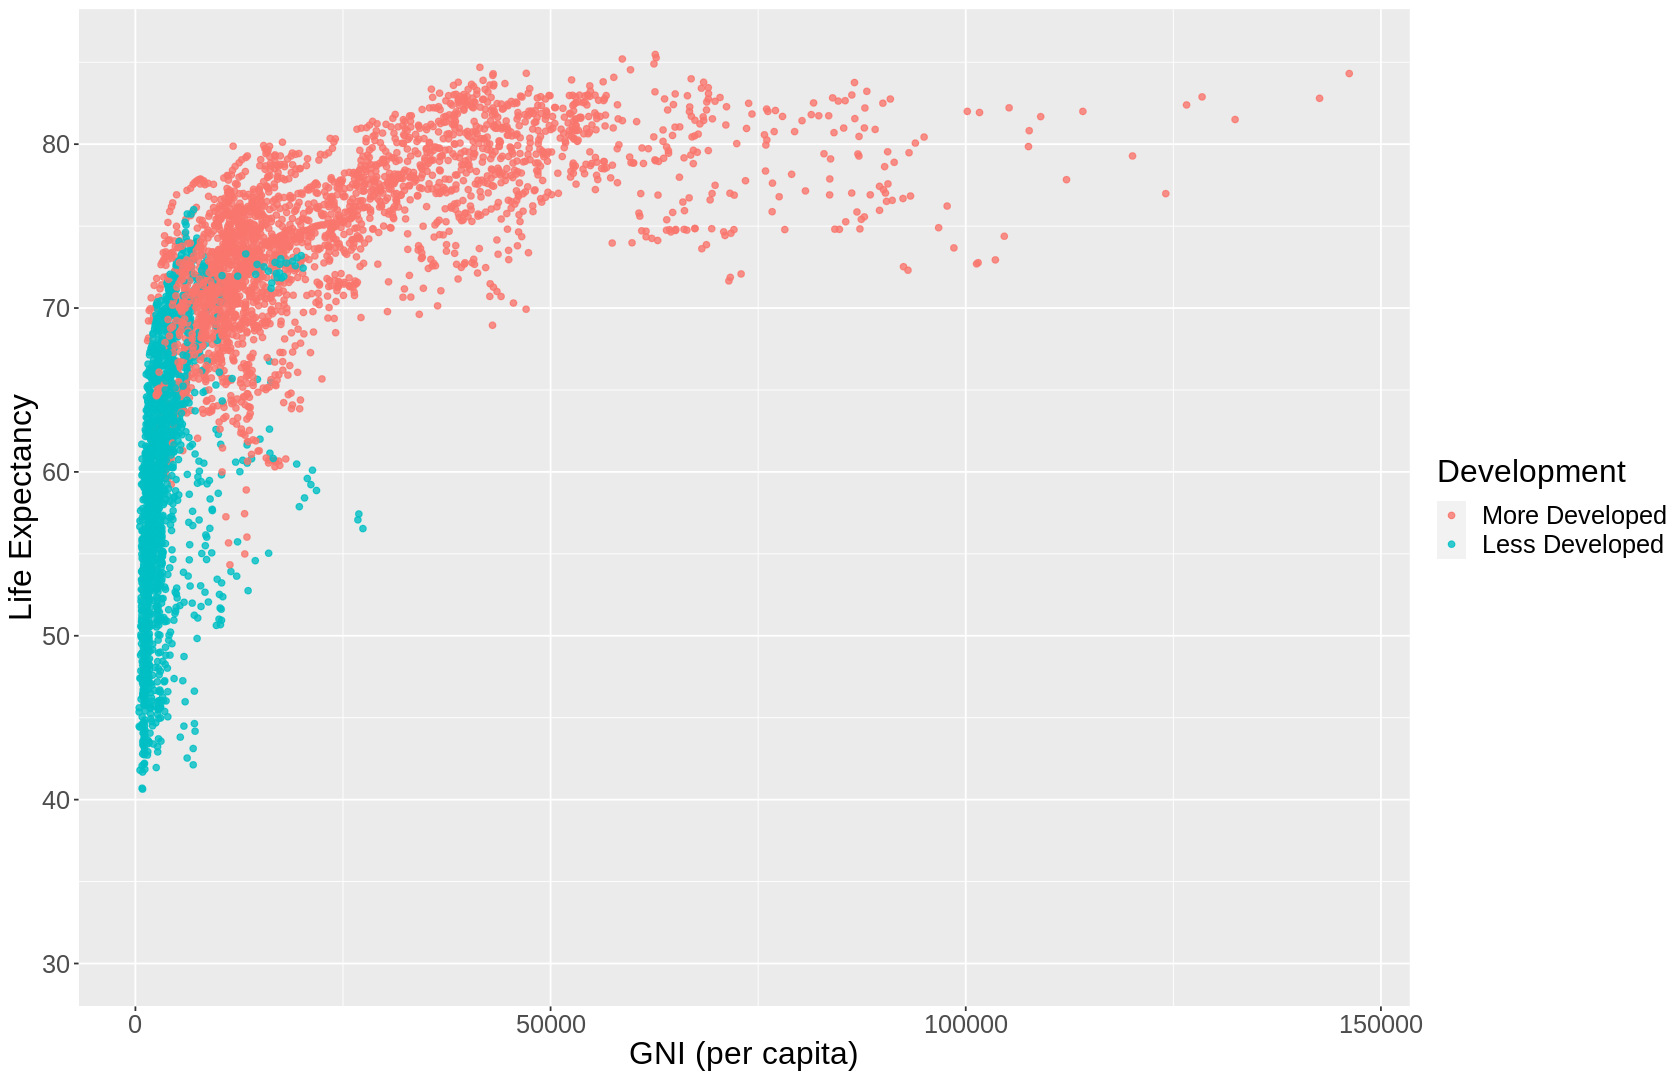

In [14]:
gni_plot

#### Plot life expectancy against poverty rate:

Warning message:
“Removed 3238 rows containing missing values (geom_point).”


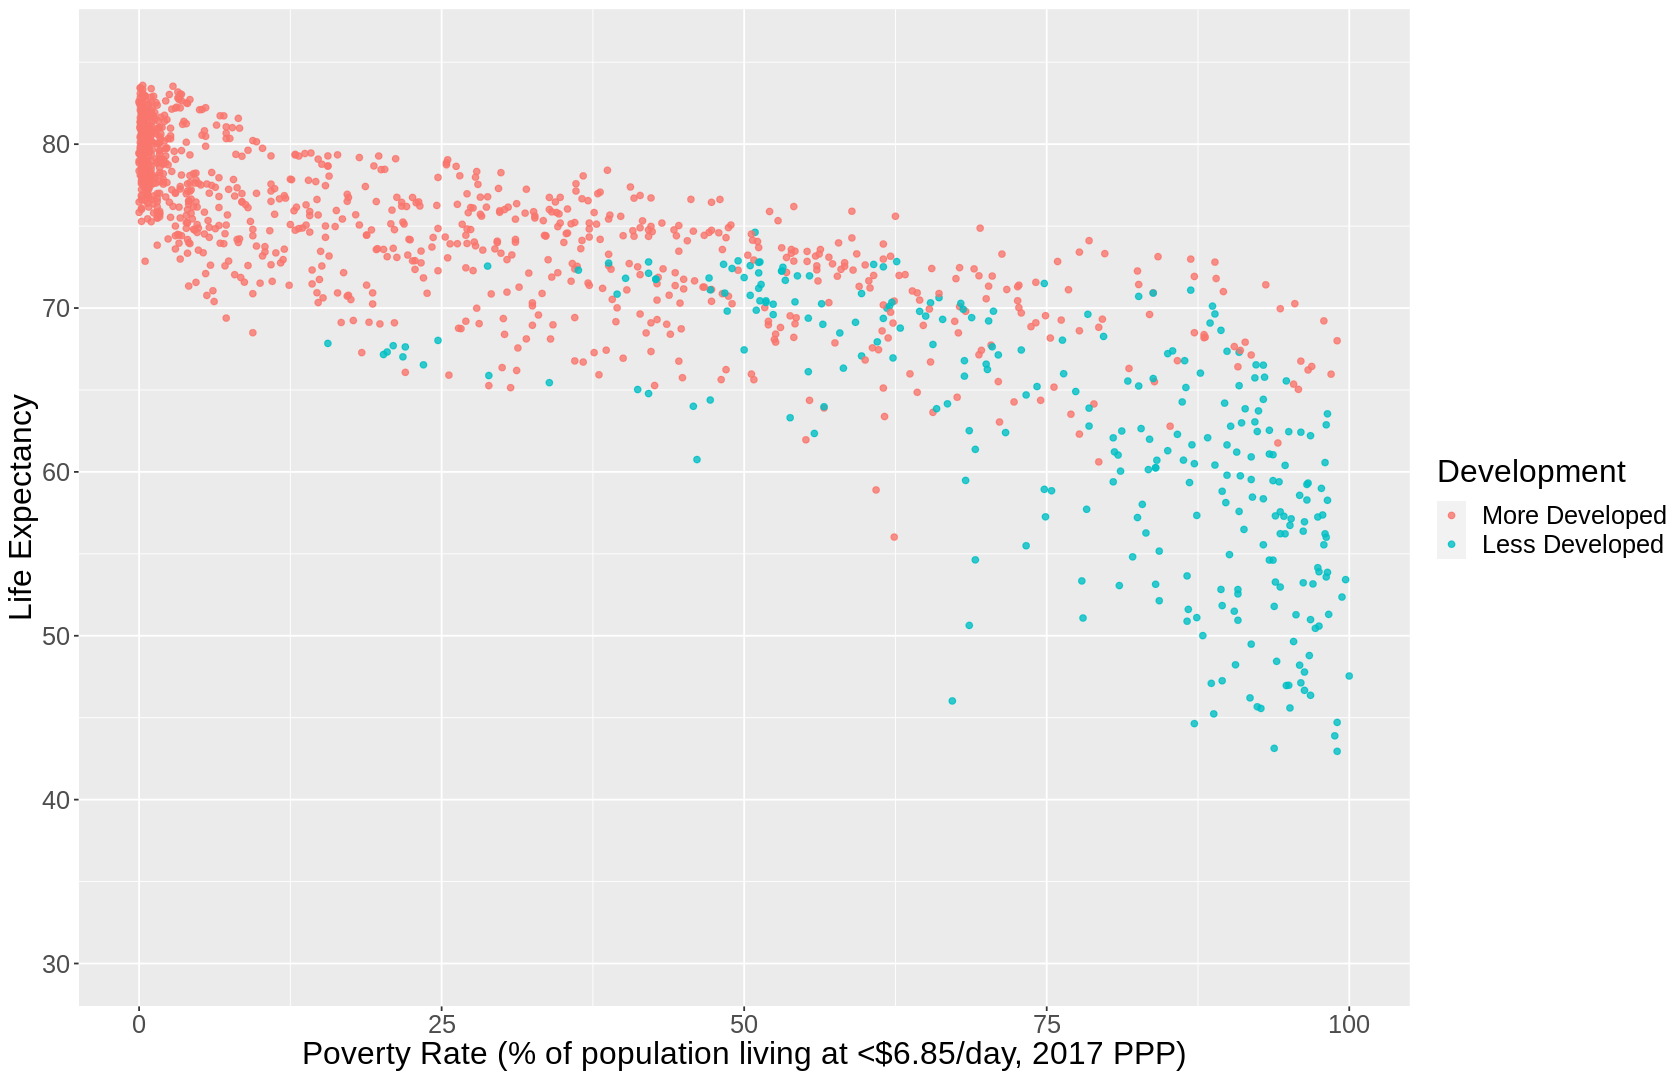

In [15]:
poverty_plot

#### Plot life expectancy against the mean years of schooling:

Warning message:
“Removed 322 rows containing missing values (geom_point).”


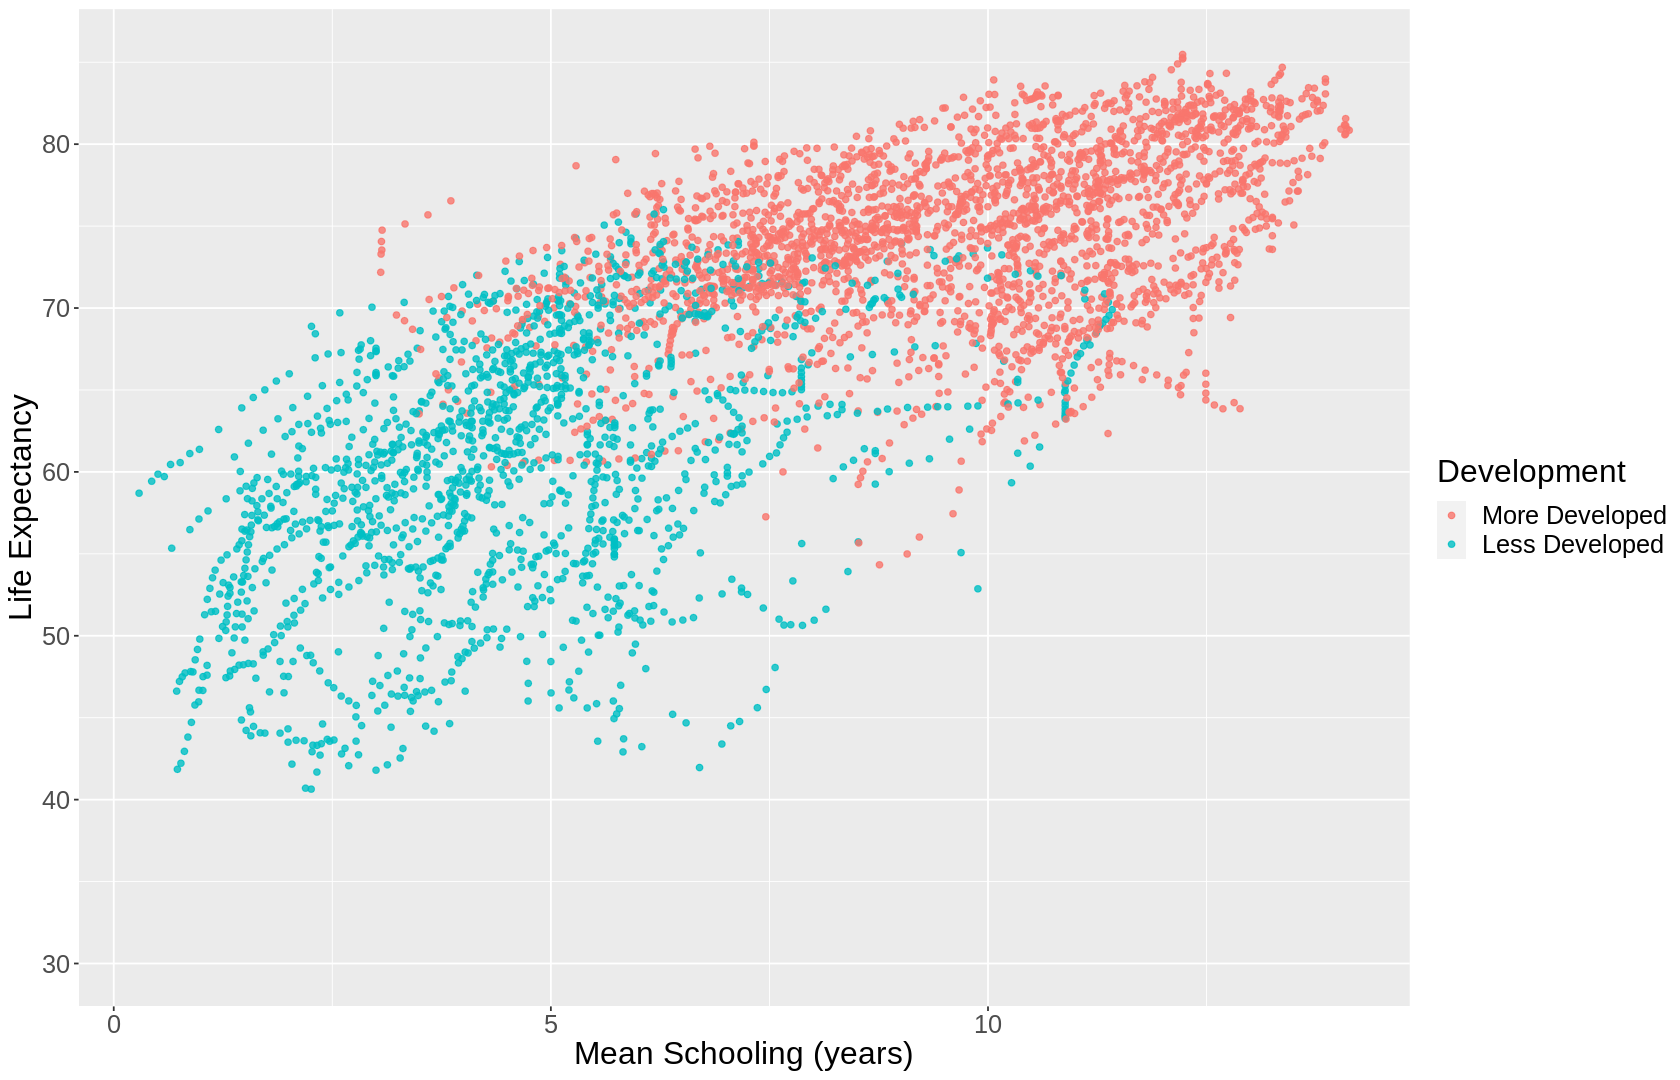

In [16]:
schooling_plot

#### Plot life expectancy against CO<sub>2</sub> emissions (tonnes per capita):

Warning message:
“Removed 39 rows containing missing values (geom_point).”


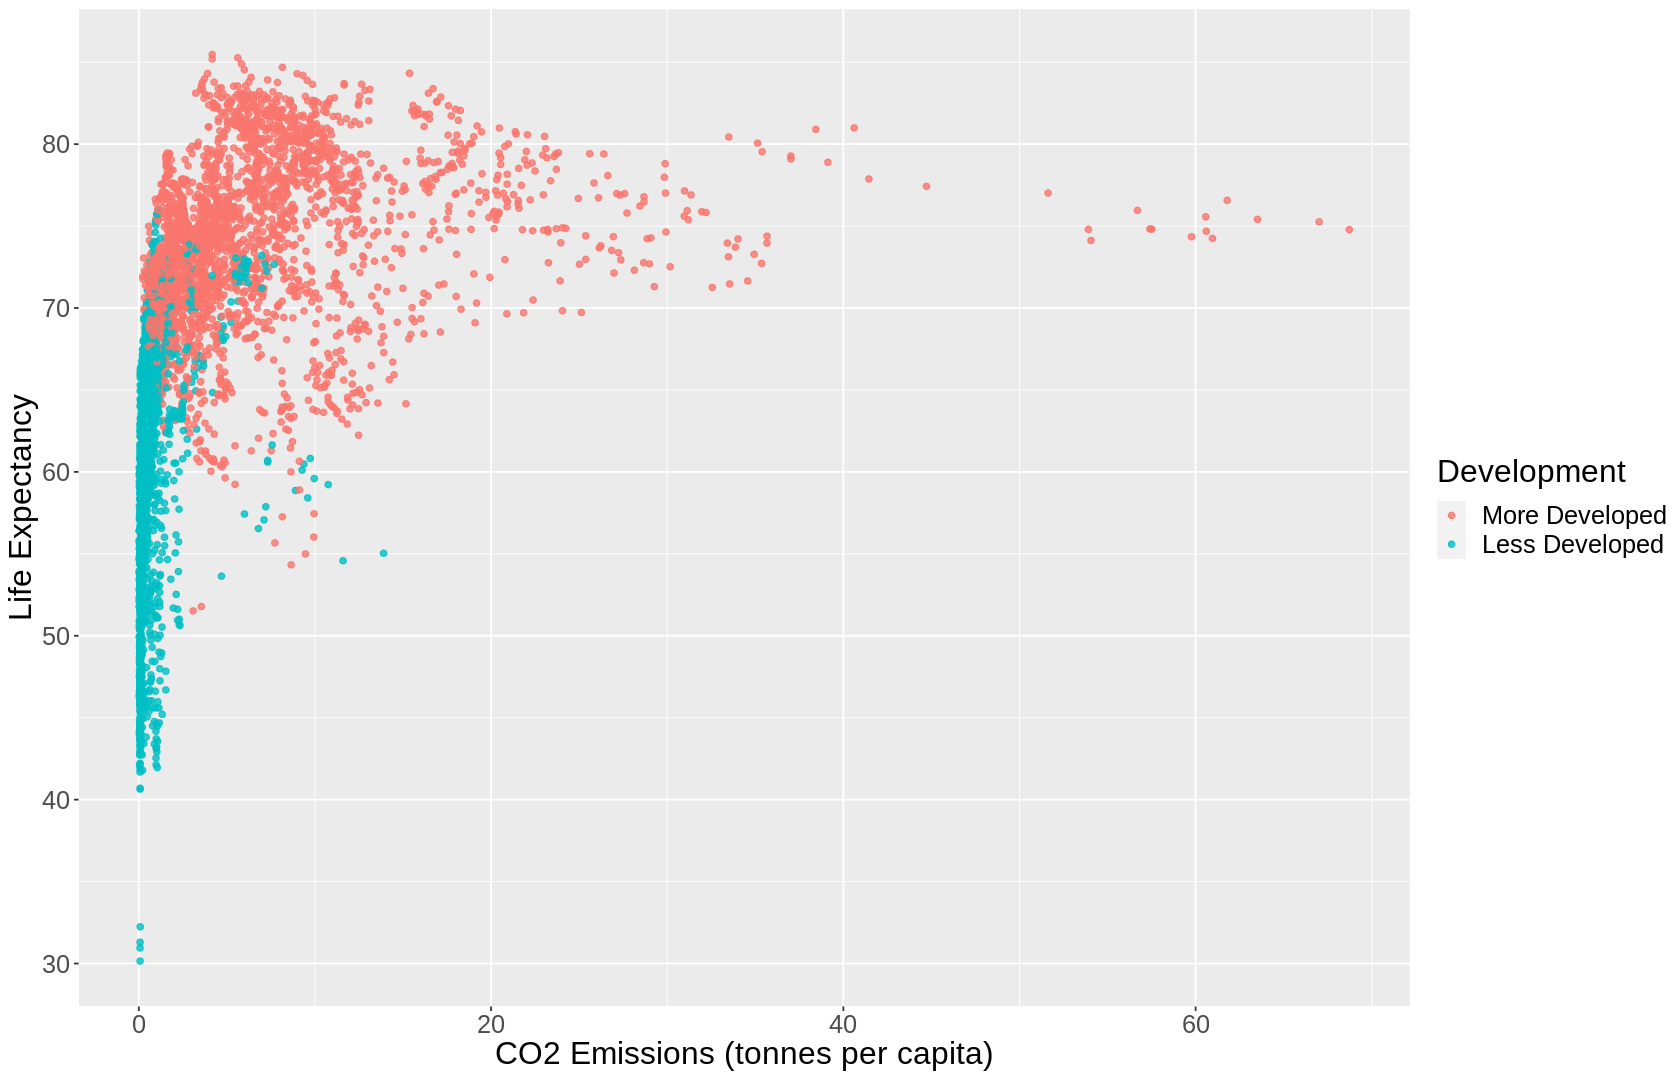

In [17]:
co2_plot

### Methods: 
1. We will be combining two datasets which are created by the United Nations Development Programme and the World Bank.

2. We will focus on four variables as predictors for life expectancy at birth, which include: carbon dioxide emissions per capita, mean years of schooling, gross national income per capita, poverty rate (% of population at $6.85/day in 2017 PPP).

3. We will combine countries with 'Very High' and 'High' human development indices into 'More Developed' category, and combine countries with 'Medium' and 'Low' indices into 'Less Developed' category.

4. We will perform a multivariable regression with our five factors in order to predict life expectancy at birth

5. We will use four scatterplots to visualize our result for each of our factors with our regression lines overlaid on their respective plots. We will also create a table displaying the RMSPE of each of our regressions, to compare the predictive power of each more easily.

### Expected outcomes and significance: 
We expect to find relationships between all four of our selected socioeconomic factors and life expectancy at birth. 

1. The use of fossil fuels has increased dramatically over the years following the industrial revolution and remains popular today. As a result, its by-product, carbon dioxide, has also increased in concentration in the atmosphere. Several decades of research over the years have indicated that rising air pollution caused by fossil fuel emissions threatens local ecosystems and accelerates global warming (Balakrishnan et al., 2018). As such, air pollution threatens the population's health, and therefore life expectancy. We expect to find a negative relationship between CO2 emissions and life expectancy.

2. Education is an important part of societal structure, as such, it will be considered as a factor on life expectancy. Past research has indicated that higher levels of schooling lead to higher life expectancies due to more informed decisions and healthier lifestyles (Blackburn and Cipriani, 2002). In addition, the ability to attend school in some countries is linked with socioeconomic status. Therefore, we expect to see a positive relationship of mean years of schooling on life expectancy.

3. The gross national income is the total amount of money earned by a country's people and businesses, calculated from their income. At a national level, a higher GNI allows more expense for health promoting public systems, such as improved healthcare and sanitation. Therefore, we expect a positive relationship between GNI and life expectancy. 

4. Lastly, the poverty headcount ratio shows the percentage of the country's population who has less than $6.85 to spend per day, in 2017 PPP dollars. Financial poverty very often leads to social effects such as poor living conditions and limited access to housing or healthcare. We expect a negative relationship between poverty ratio and life expectancy at birth. 


These findings will enable us to identify socioeconomic factors that contribute to life expectancy at birth, and this information will guide questions on how humanitarian efforts may target specific factors such as education that would have the greatest impact on extending life expectancy in less developed countries. In addition, our findings may inform other avenues of research, such as how the model for the social cost of carbon could be improved by including life expectancy as a factor.

### References

Max Roser, Esteban Ortiz-Ospina and Hannah Ritchie (2013) - "Life Expectancy". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/life-expectancy' [Online Resource]

World Health Organization, (2020). Ghe: Life expectancy and healthy life expectancy. World Health Organization. Retrieved October 24, 2022, from https://www.who.int/data/gho/data/themes/mortality-and-global-health-estimates/ghe-life-expectancy-and-healthy-life-expectancy 